# Q1

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('db1.csv')
df.index = np.char.add("R", np.arange(1,len(df.index)+1).astype("str"))

In [20]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18
R1,4,8,5,9,9,8,8,10,9,8,7,8,7,7,6,7,8,8
R2,7,5,8,7,9,7,7,8,7,9,8,5,6,7,7,5,5,7
R3,8,9,10,9,10,10,9,8,10,10,10,10,9,10,7,7,8,9
R4,7,8,9,6,8,5,6,6,7,5,5,6,2,5,4,6,5,4
R5,6,6,7,7,8,5,8,7,4,7,7,7,4,6,5,3,4,7
R6,8,3,9,3,4,7,8,6,6,10,8,5,5,8,7,7,9,10
R7,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
R8,5,4,7,8,5,6,7,1,3,1,6,8,5,7,7,8,8,10
R9,7,3,9,10,4,9,8,5,10,10,8,10,9,6,7,8,7,10
R10,8,3,10,8,4,8,5,8,5,8,8,8,5,9,7,2,5,9


## Internal **consistancy**

In [5]:
import pingouin as pg

pg.cronbach_alpha(data=df)

(0.9237818932460822, array([0.868, 0.963]))

## Inter-rater consistancy

In [21]:
from statsmodels.stats.inter_rater import fleiss_kappa
from statsmodels.stats import inter_rater as irr
def interRaterConsistancy(df):
    arr = df.to_numpy()
    agg = irr.aggregate_raters(arr)
    return irr.fleiss_kappa(agg[0], method='fleiss')

In [22]:
interRaterConsistancy(df)

0.10841501902449105

## Intra-rater consistancy

In [23]:
def intraRaterConsistancy(df):
    df_c = df.copy()
    df_c.insert(0,'Rating','')
    df_c["Rating"] = list(df.index)
    df_melt = df_c.melt(id_vars=['Rating'],var_name='Music')
    icc = pg.intraclass_corr(data=df_melt, targets='Music', raters='Rating', ratings='value')
    return icc.set_index('Type')

In [24]:
intraRaterConsistancy(df)

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.018516,1.415030,17,378,0.125551,"[-0.01, 0.09]"
ICC2,Single random raters,0.035825,2.367835,17,357,0.001827,"[0.01, 0.11]"
ICC3,Single fixed raters,0.058535,2.367835,17,357,0.001827,"[0.01, 0.17]"
ICC1k,Average raters absolute,0.293301,1.415030,17,378,0.125551,"[-0.28, 0.69]"
ICC2k,Average random raters,0.449771,2.367835,17,357,0.001827,"[0.15, 0.72]"
ICC3k,Average fixed raters,0.577673,2.367835,17,357,0.001827,"[0.23, 0.81]"


## Outlier detection

In [11]:
from statsmodels.stats import inter_rater as irr
from scipy import stats

### Quadrile method

In [25]:
def outilersQuadrile(df):
  for i in range(1,len(df.columns)):

      Q1 = np.quantile(df[f'Q{i}'], 0.25)
      
      Q3 = np.quantile(df[f'Q{i}'], 0.75)
      IQR = Q3 - Q1

      U = df[f'Q{i}'] >= (Q3+1.5*IQR)
      L = df[f'Q{i}'] <= (Q1-1.5*IQR)
      
      Outliers = np.where(U + L)[0]
      
      if len(Outliers) >0:
        print(f'Outliers for Quote {i}: {Outliers}')

In [26]:
outilersQuadrile(df)

Outliers for Quote 3: [10]
Outliers for Quote 4: [10 15]
Outliers for Quote 5: [10]
Outliers for Quote 6: [ 2  3  4 10]
Outliers for Quote 7: [ 9 10 11]
Outliers for Quote 8: [ 7 10]
Outliers for Quote 9: [ 4  7 10]
Outliers for Quote 10: [ 7 10]
Outliers for Quote 11: [ 2  3 10 13]
Outliers for Quote 12: [10]
Outliers for Quote 14: [10]
Outliers for Quote 15: [ 3  4  6 12 15 20]
Outliers for Quote 16: [ 9 10]
Outliers for Quote 17: [10]


### Z-score method

In [28]:
def outliersZscore(df):
  for i in range(1, 19): # Comparison using z score to detect outliers
      z = np.abs(stats.zscore(df[f'Q{i}']))
      if len(np.where(z>3)[0]) >0:
        print(f'Outliers for quote {i}: {np.where(z > 3)[0]}')

In [30]:
outliersZscore(df)

Outliers for quote 6: [10]
Outliers for quote 7: [10]
Outliers for quote 11: [10]
Outliers for quote 14: [10]


In [48]:
means = np.array(df.mean())

In [53]:
conservative = np.array([1,3,4,7,9,10,11,13,14,15,18])
liberal= np.array([2,5,6,8,12,16,17])

In [68]:
np.median(means[conservative-1])

7.2272727272727275

In [69]:
np.median(means[liberal-1])

6.7272727272727275

In [79]:
import matplotlib.pyplot as plt
import matplotlib

(0.0, 10.0)

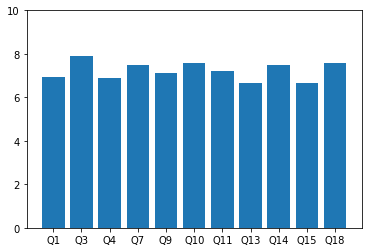

In [66]:
plt.bar(np.char.add("Q", conservative.astype("str")),means[conservative-1])
plt.ylim(top=10)

(0.0, 10.0)

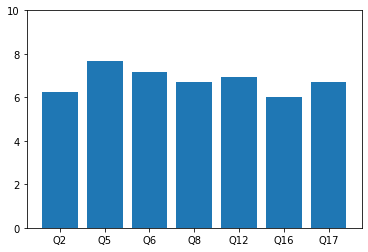

In [67]:
plt.bar(np.char.add("Q", liberal.astype("str")),means[liberal-1])
plt.ylim(top=10)

/tmp/ipykernel_96427/1792034288.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns)


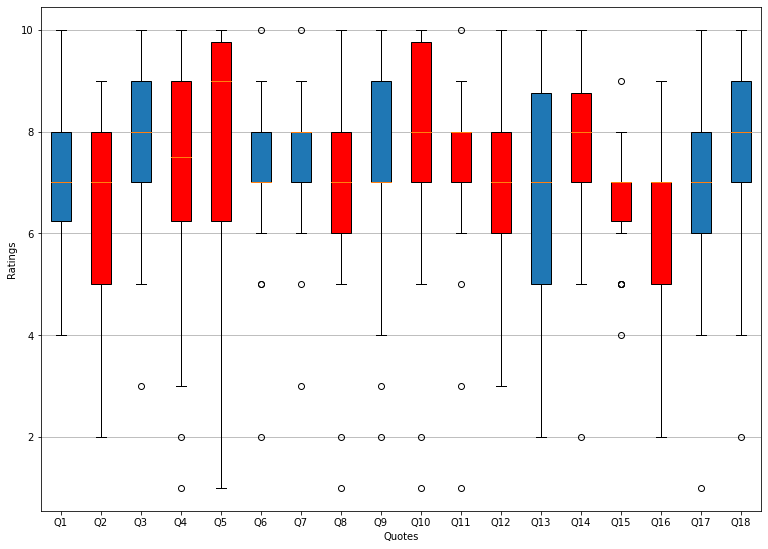

In [90]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df.columns)
# Creating plot
bp = ax.boxplot(df.values,patch_artist=True,)
for c in conservative:
    ax.findobj(matplotlib.patches.Patch)[c].set_facecolor("red")
ax.yaxis.grid(True)
ax.set_xlabel('Quotes')
ax.set_ylabel('Ratings')
# show plot
plt.show()

In [93]:
ls

quote_similarity.csv  quotes_rated.csv  report.docx  report.ipynb


In [94]:
df = pd.read_csv('quote_similarity.csv')
df.index = np.char.add("R", np.arange(1,len(df.index)+1).astype("str"))

df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
R1,3,3,4,5,5,5,5,5,5,5,6,4
R2,2,3,2,5,5,1,1,6,6,3,2,1
R3,2,3,5,1,6,4,1,1,3,6,4,1
R4,1,6,5,5,3,2,4,6,2,1,5,4
R5,6,4,1,5,5,6,3,4,2,2,5,1
R6,3,1,4,5,4,6,6,3,2,5,3,1
R7,6,6,6,6,5,4,2,3,5,5,5,2
R8,4,4,5,6,5,4,5,4,4,5,5,4
R9,1,2,4,5,4,1,3,2,2,5,5,1
R10,2,3,4,5,4,1,3,2,1,2,6,4


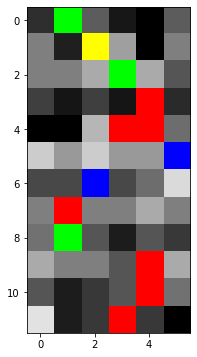

In [149]:
grid=[]
for i in range(1,13):
    grid.append(np.histogram(df[f"Q{i}"],bins=6,range=(1,6))[0]/max(np.histogram(df[f"Q{i}"],bins=6,range=(1,6))[0]))
grid = np.transpose([grid,grid,grid],axes=(1,2,0))
# print(np.argmax(grid,axis=1))
for i in range(12):
    for j in range(6):
        if(grid[i,j,0] == 1):
            if i in conservative and j in conservative:
                grid[i,j] = [1,0,0]
            elif i in liberal and j in liberal:
                grid[i,j] = [0,0,1]
            elif i in conservative and j in liberal:
                grid[i,j] = [1,1,0]
            else:
                grid[i,j] = [0,1,0]
plt.figure(figsize=(12, 6))
plt.imshow(grid)